<a href="https://colab.research.google.com/github/riszwinger/tensorflow_cert/blob/main/basic/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('GPU is','avaliable' if tf.config.list_physical_devices('GPU') else 'not avaliable')
print('TF Version: {}'.format(tf.__version__))
%matplotlib inline

GPU is not avaliable
TF Version: 2.5.0


## read Data

In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
missing_cols=(raw_dataset.isnull().sum())
missing_cols=missing_cols[missing_cols>0]
missing_cols

Horsepower    6
dtype: int64

In [12]:
df=raw_dataset.dropna()
print('Original Shape: {}\nAfter dropping NA: {}'.format(raw_dataset.shape,df.shape))

Original Shape: (398, 8)
After dropping NA: (392, 8)


In [15]:
train_df=df.sample(frac=0.8,random_state=7)
test_df=df.drop(train_df.index)
print('Train Shape: {}\nTest Shape: {}'.format(train_df.shape,test_df.shape))

Train Shape: (314, 8)
Test Shape: (78, 8)


In [16]:
train_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
240,30.5,4,97.0,78.0,2190.0,14.1,77,2
272,23.8,4,151.0,85.0,2855.0,17.6,78,1
215,13.0,8,318.0,150.0,3755.0,14.0,76,1
362,24.2,6,146.0,120.0,2930.0,13.8,81,3
58,25.0,4,97.5,80.0,2126.0,17.0,72,1


In [17]:
train_df=train_df.reset_index(drop=True)
test_df=test_df.reset_index(drop=True)

In [19]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.693312,7.842001,9.0,17.125,23.0,29.725,46.6
Cylinders,314.0,5.414013,1.695868,3.0,4.000,4.0,7.500,8.0
Displacement,314.0,191.278662,103.964403,68.0,105.000,140.5,260.000,455.0
Horsepower,314.0,103.726115,38.411362,46.0,75.000,92.0,120.000,230.0
Weight,314.0,2956.738854,850.706406,1613.0,2216.000,2737.5,3618.250,5140.0
Acceleration,314.0,15.579618,2.728040,8.0,14.000,15.5,17.075,24.8
Model Year,314.0,76.015924,3.638154,70.0,73.000,76.0,79.000,82.0
Origin,314.0,1.589172,0.815197,1.0,1.000,1.0,2.000,3.0


In [21]:
cols_to_ignore=['MPG','Origin']
cols_to_use=[col for col in train_df.columns if col not in cols_to_ignore]
print('Features: {}'.format(cols_to_use))

Features: ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']


In [22]:
X_train=train_df[cols_to_use]
y_train=train_df[['MPG']]

X_test=test_df[cols_to_use]
y_test=test_df[['MPG']]

print('X_train Shape: {}, X_test Shape: {}'.format(X_train.shape,X_test.shape))
print('y_train Shape: {}, y_test Shape: {}'.format(y_train.shape,y_test.shape))

X_train Shape: (314, 6), X_test Shape: (78, 6)
y_train Shape: (314, 1), y_test Shape: (78, 1)


In [23]:
norm_layer=tf.keras.layers.experimental.preprocessing.Normalization()

## This calculates the mean and variance, and stores them in the layer.



In [29]:
np.array(X_train)

array([[   4. ,   97. ,   78. , 2190. ,   14.1,   77. ],
       [   4. ,  151. ,   85. , 2855. ,   17.6,   78. ],
       [   8. ,  318. ,  150. , 3755. ,   14. ,   76. ],
       ...,
       [   4. ,   89. ,   71. , 1990. ,   14.9,   78. ],
       [   6. ,  198. ,   95. , 3102. ,   16.5,   74. ],
       [   4. ,   76. ,   52. , 1649. ,   16.5,   74. ]])

In [30]:
norm_layer.adapt(np.array(X_train))

## Mean & Variance

In [33]:
print(norm_layer.mean.numpy())

[   5.414013  191.2787    103.726105 2956.739      15.579618   76.01594 ]


In [35]:
print(norm_layer.variance.numpy())

[2.8668098e+00 1.0774173e+04 1.4707338e+03 7.2139650e+05 7.4185014e+00
 1.3194015e+01]


## Model Building

In [38]:
model=tf.keras.models.Sequential([
                                  norm_layer,
                                  tf.keras.layers.Dense(1)

])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 6)                 13        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 20
Trainable params: 7
Non-trainable params: 13
_________________________________________________________________


In [39]:
model.compile(optimizer='adam',loss='mean_absolute_error')

In [40]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2,verbose=0)

In [45]:
res_df=pd.DataFrame(history.history)
res_df['epochs']=range(len(history.history['loss']))
res_df.shape

(100, 3)

In [46]:
res_df.head()

,loss,val_loss,epochs
0,23.642183,23.877171,0
1,23.633770,23.869352,1
2,23.625751,23.861568,2
3,23.617668,23.853790,3
4,23.609678,23.846024,4


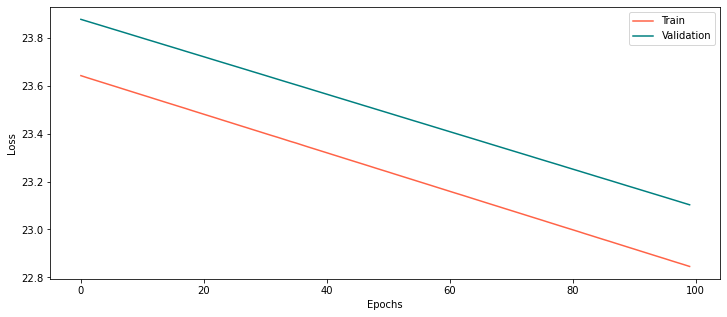

In [51]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(res_df.epochs,res_df.loss,color='tomato',label='Train')
ax.plot(res_df.epochs,res_df.val_loss,color='teal',label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend()
plt.show()

In [56]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

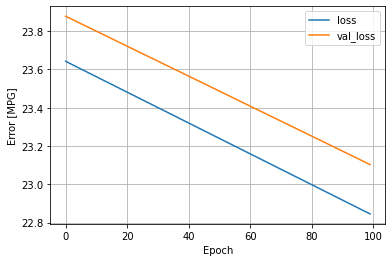

In [57]:
plot_loss(history)

## DNN

In [60]:
model1=tf.keras.models.Sequential([
                                  norm_layer,
                                  tf.keras.layers.Dense(64,activation='relu'),
                                  tf.keras.layers.Dense(64,activation='relu'),
                                  tf.keras.layers.Dense(64,activation='relu'),
                                  tf.keras.layers.Dense(1)

])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 6)                 13        
_________________________________________________________________
dense_6 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 8,846
Trainable params: 8,833
Non-trainable params: 13
_________________________________________________________________


In [61]:
model1.compile(optimizer='adam',loss='mean_absolute_error')
history=model1.fit(X_train,y_train,epochs=100,validation_split=0.2,verbose=0)

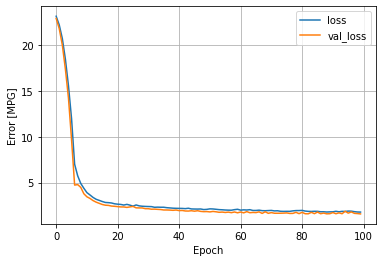

In [62]:
plot_loss(history)

In [63]:
model1.predict(X_train[:10])

array([[30.499315],
       [24.06633 ],
       [14.785589],
       [24.16321 ],
       [26.093815],
       [24.037603],
       [23.510576],
       [23.92185 ],
       [28.797344],
       [23.074554]], dtype=float32)